In [96]:
import numpy as np
import re
import pandas as pd

In [97]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [124]:
%%R
library(tidyverse)
library(magrittr)

In [125]:
with open('input_day17_stg.txt', 'rt') as f:
    input_raw=f.read()
print(input_raw)

target area: x=20..30, y=-10..-5



In [135]:
with open('input_day17_prd.txt', 'rt') as f:
    input_raw=f.read()
print(input_raw)

target area: x=201..230, y=-99..-65



In [136]:
ta={k: [int(vv) for vv in v.split('..')] for k, v in re.search(r'target area: x=(?P<x>-?\d+\.\.-?\d+), y=(?P<y>-?\d+\.\.-?\d+)', input_raw).groupdict().items()}
ta

{'x': [201, 230], 'y': [-99, -65]}

In [128]:
def print_area():
    ymax=max(ta['y']+[p[1] for p in positions])
    ymin=min(ta['y']+[p[1] for p in positions])
    xmax=max(ta['x']+[p[0] for p in positions])
#    xmax=max(ta['x'])
    
    for j in range(ymax, ymin-1, -1):
        for i in range(xmax+1):
            if (ta['x'][0] <= i <= ta['x'][1]) & (ta['y'][0] <= j <= ta['y'][1]):
                if [i, j] in positions:
                    print('#', end='')
                else:
                    print(':', end='')
            elif [i, j] in positions:
                if [i, j] == [0, 0]:
                    print('S', end='')
                else:
                    print('o', end='')
            else:
                print('.', end='')
        print()

In [222]:
def launch(vel_x, vel_y):
    global positions
    pos_x = 0
    pos_y = 0

    positions=[[pos_x, pos_y]]

    hit=False

    while pos_y >=  ta['y'][0]:
        pos_x += vel_x
        pos_y += vel_y
        positions.append([pos_x, pos_y])

        vel_x -= np.sign(vel_x)
        vel_y -= 1

        if (ta['x'][0] <= pos_x <= ta['x'][1]) & (ta['y'][0] <= pos_y <= ta['y'][1]):
            hit = True
            break

#    print(hit)
    return hit
    #print_area()


In [223]:
launch(20, 98)
positions_df=(
    pd.DataFrame({'x': [p[0] for p in positions], 'y': [p[1] for p in positions]})
        .assign(hit=lambda df: df.apply(lambda r: (ta['x'][0] <= r['x'] <= ta['x'][1]) & (ta['y'][0] <= r['y'] <= ta['y'][1]), axis=1))
)
ta_df=pd.DataFrame(ta)
ta_df

,x,y
0,201,-99
1,230,-65


In [225]:
best_y=0
for i in range(0, 1000):
    if launch(20, i):
        best_y=i
best_y

98

In [234]:
launch(20, best_y)
positions_df=(
    pd.DataFrame({'x': [p[0] for p in positions], 'y': [p[1] for p in positions]})
        .assign(hit=lambda df: df.apply(lambda r: (ta['x'][0] <= r['x'] <= ta['x'][1]) & (ta['y'][0] <= r['y'] <= ta['y'][1]), axis=1))
)
ta_df=pd.DataFrame(ta)
ta_df

,x,y
0,201,-99
1,230,-65


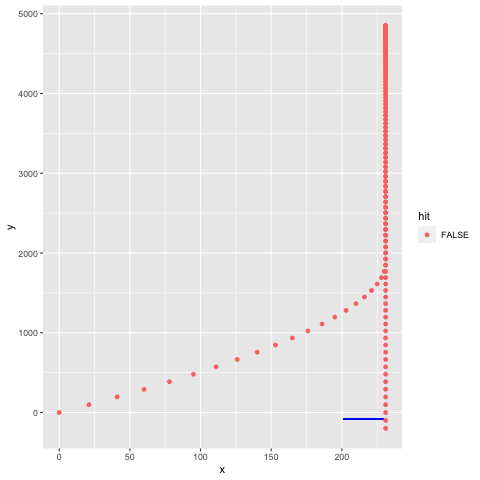

In [233]:
%%R -i ta_df -i positions_df
positions_df %>%
    ggplot() +
        geom_rect(xmin=ta_df[1, 'x'], xmax=ta_df[2, 'x'], ymin=ta_df[1, 'y'], ymax=ta_df[2, 'y'], fill='blue') +
        geom_point(aes(x, y, color=hit))

In [228]:
max(v[1] for v in positions)

4851

In [229]:
#Part 2

In [235]:
launch(10, 0)
positions_df=(
    pd.DataFrame({'x': [p[0] for p in positions], 'y': [p[1] for p in positions]})
        .assign(hit=lambda df: df.apply(lambda r: (ta['x'][0] <= r['x'] <= ta['x'][1]) & (ta['y'][0] <= r['y'] <= ta['y'][1]), axis=1))
)
ta_df=pd.DataFrame(ta)
ta_df

,x,y
0,201,-99
1,230,-65


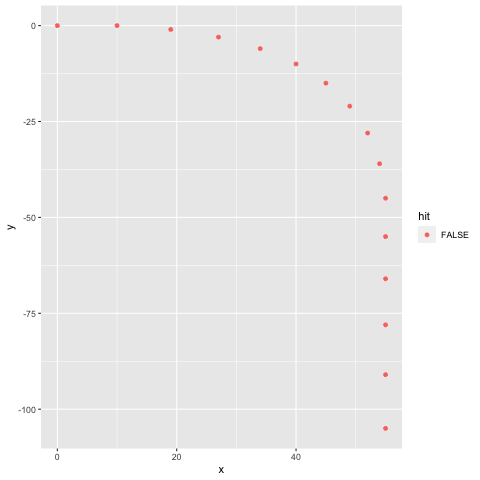

In [236]:
%%R -i ta_df -i positions_df
positions_df %>%
    ggplot() +
        geom_rect(xmin=ta_df[1, 'x'], xmax=ta_df[2, 'x'], ymin=ta_df[1, 'y'], ymax=ta_df[2, 'y'], fill='blue') +
        geom_point(aes(x, y, color=hit))

In [285]:
best_y=0
all_y=[]
all_positions=[]
for i in range(0, 250):
    for j in range(-150, 200):
        if launch(i, j):
            best_y=i
            all_y.append([i, j])
            all_positions.append({'p': positions, 'vel_x': i, 'vel_y': j})
best_y
all_y

[[20, 3],
 [20, 4],
 [20, 5],
 [20, 6],
 [20, 7],
 [20, 8],
 [20, 9],
 [20, 10],
 [20, 11],
 [20, 12],
 [20, 13],
 [20, 14],
 [20, 15],
 [20, 16],
 [20, 17],
 [20, 18],
 [20, 19],
 [20, 20],
 [20, 21],
 [20, 22],
 [20, 23],
 [20, 24],
 [20, 25],
 [20, 26],
 [20, 27],
 [20, 28],
 [20, 29],
 [20, 30],
 [20, 31],
 [20, 32],
 [20, 33],
 [20, 34],
 [20, 35],
 [20, 36],
 [20, 37],
 [20, 38],
 [20, 39],
 [20, 40],
 [20, 41],
 [20, 42],
 [20, 43],
 [20, 44],
 [20, 45],
 [20, 46],
 [20, 47],
 [20, 48],
 [20, 64],
 [20, 65],
 [20, 66],
 [20, 67],
 [20, 68],
 [20, 69],
 [20, 70],
 [20, 71],
 [20, 72],
 [20, 73],
 [20, 74],
 [20, 75],
 [20, 76],
 [20, 77],
 [20, 78],
 [20, 79],
 [20, 80],
 [20, 81],
 [20, 82],
 [20, 83],
 [20, 84],
 [20, 85],
 [20, 86],
 [20, 87],
 [20, 88],
 [20, 89],
 [20, 90],
 [20, 91],
 [20, 92],
 [20, 93],
 [20, 94],
 [20, 95],
 [20, 96],
 [20, 97],
 [20, 98],
 [21, 0],
 [21, 1],
 [21, 2],
 [21, 3],
 [21, 4],
 [21, 5],
 [21, 6],
 [22, -1],
 [22, 0],
 [22, 1],
 [22, 2],
 [23,

In [286]:
len(all_y)

1739

In [287]:
all_positions_df=(
    pd.DataFrame({
        'run': [i for i, pp in enumerate(all_positions) for p in pp['p']],
        'x': [p[0] for pp in all_positions for p in pp['p']], 
        'y': [p[1] for pp in all_positions for p in pp['p']],
        'vel_x': [pp['vel_x'] for pp in all_positions for p in pp['p']],
        'vel_y': [pp['vel_y'] for pp in all_positions for p in pp['p']],
    }).assign(hit=lambda df: df.apply(lambda r: (ta['x'][0] <= r['x'] <= ta['x'][1]) & (ta['y'][0] <= r['y'] <= ta['y'][1]), axis=1))
)
all_positions_df


,run,x,y,vel_x,vel_y,hit
0,0,0,0,20,3,False
1,0,20,3,20,3,False
2,0,39,5,20,3,False
3,0,57,6,20,3,False
4,0,74,6,20,3,False
...,...,...,...,...,...,...
13377,1736,230,-67,230,-67,True
13378,1737,0,0,230,-66,False
13379,1737,230,-66,230,-66,True
13380,1738,0,0,230,-65,False


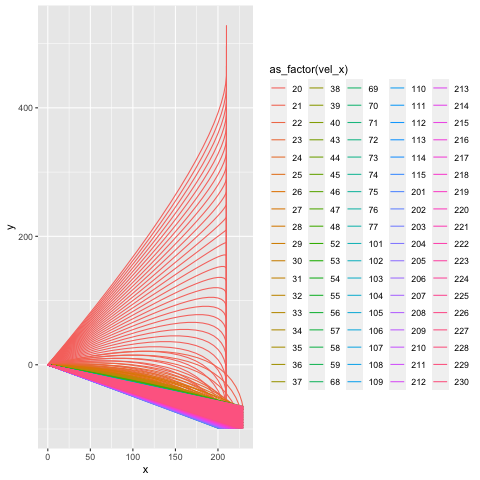

In [288]:
%%R -i ta_df -i all_positions_df
all_positions_df %>% filter((run<30)|(vel_x>20)) %>%
    ggplot() +
        geom_rect(xmin=ta_df[1, 'x'], xmax=ta_df[2, 'x'], ymin=ta_df[1, 'y'], ymax=ta_df[2, 'y'], fill='blue') +
        geom_line(aes(x, y, color=as_factor(vel_x), group=run))

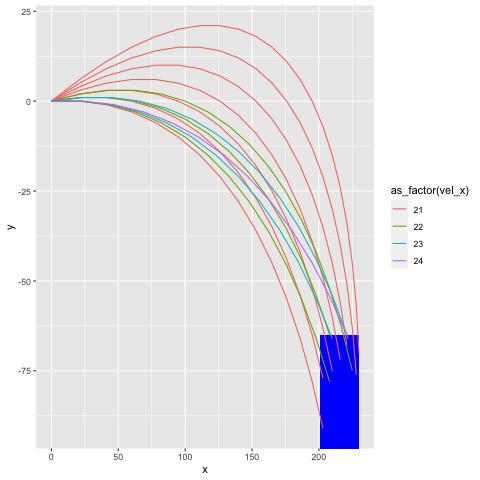

In [291]:
%%R -i ta_df -i all_positions_df
all_positions_df %>% filter(vel_x>20, vel_y>=0) %>%
    ggplot() +
        geom_rect(xmin=ta_df[1, 'x'], xmax=ta_df[2, 'x'], ymin=ta_df[1, 'y'], ymax=ta_df[2, 'y'], fill='blue') +
        geom_line(aes(x, y, color=as_factor(vel_x), group=run))

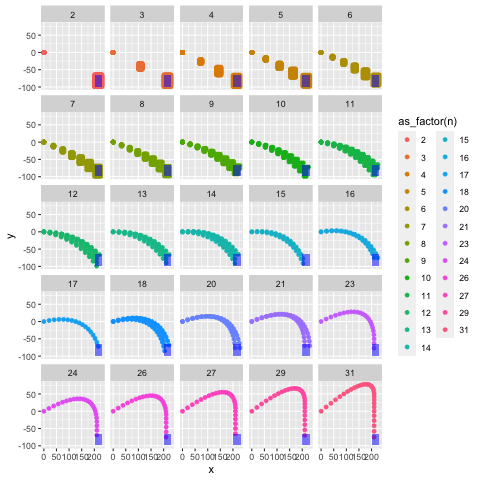

In [326]:
%%R -i ta_df -i all_positions_df
    #filter(vel_x>20) %>%
    ggplot() +
        geom_point(data=all_positions_df %>% group_by(run) %>% mutate(n=n()) %>% filter(n <= 32),
                   aes(x, y, color=as_factor(n), group=run)) +
        geom_rect(data=tibble(xmin=ta_df[1, 'x'], xmax=ta_df[2, 'x'], ymin=ta_df[1, 'y'], ymax=ta_df[2, 'y']), 
                  aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax), fill='blue', alpha=.5) +
        facet_wrap(~n)